In [1]:
import polars as pl

# preprocess module
from comvis.facial.data import FacialDataSet
from comvis.facial.haar_preprocessor import HAARPreprocessor
from comvis.facial.preprocess import PreprocTrainTest

# extractor module
from comvis.facial.extractor.hog import HOGFeatureExtractor, plot_hog_extracted_result
from comvis.facial.extractor.sift import SIFTFeatureExtractor, plot_sift_extracted_result

# classifier module
from comvis.facial.classifier.svc import SVCClassificationModel

# utils 
from comvis.facial.util import plot_image_sequence
from comvis.utils.verbose import printdf

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# load and preprocess
dat = FacialDataSet.load()
haar = HAARPreprocessor()
opt = PreprocTrainTest(dat, haar)

In [4]:
print(dat.train_distribution())

shape: (4, 3)
┌─────────────────┬─────┬───────┐
│ name            ┆ img ┆ class │
│ ---             ┆ --- ┆ ---   │
│ str             ┆ u32 ┆ i64   │
╞═════════════════╪═════╪═══════╡
│ Sarah_Hyland    ┆ 10  ┆ 0     │
│ Jesse_Eisenberg ┆ 30  ┆ 1     │
│ Michael_Cera    ┆ 10  ┆ 0     │
│ Mila_Kunis      ┆ 30  ┆ 2     │
└─────────────────┴─────┴───────┘


## Plot Train Set Face

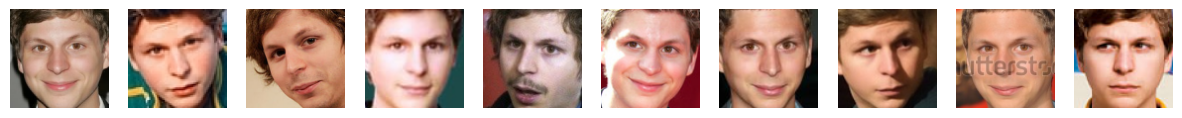

In [5]:
# plot faces of michael (label 0)
plot_image_sequence(opt.X_train_michael, imgs_per_row=10)

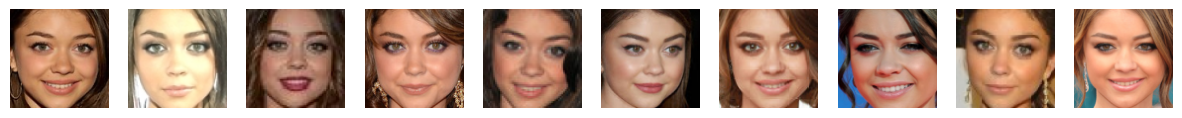

In [6]:
# plot faces of Sarah (label 0)
plot_image_sequence(opt.X_train_sarah, imgs_per_row=10)

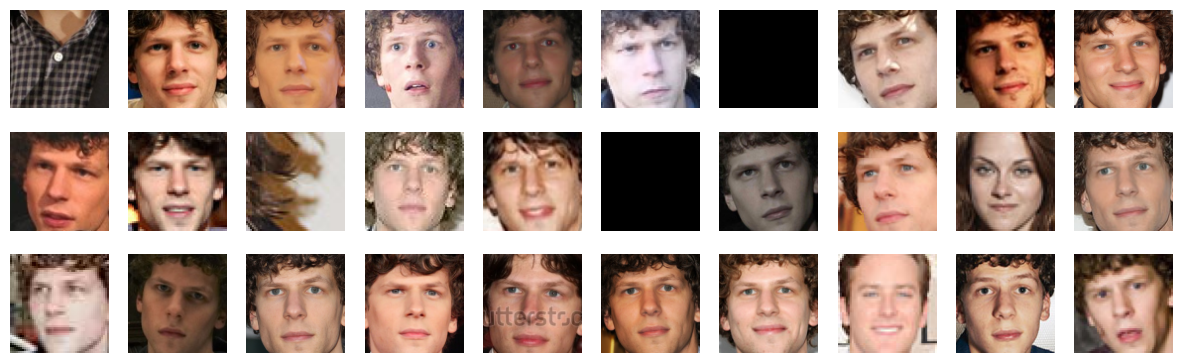

In [7]:
# plot faces of Jesse (label 1)
plot_image_sequence(opt.X_train_jesse, imgs_per_row=10)

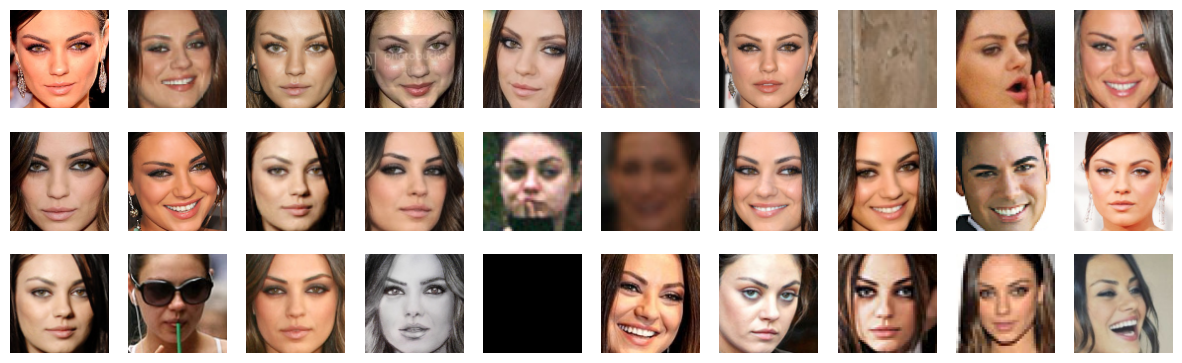

In [8]:
# plot faces of Mila (label 2)
plot_image_sequence(opt.X_train_mila, imgs_per_row=10)

## Extractor

### Hog

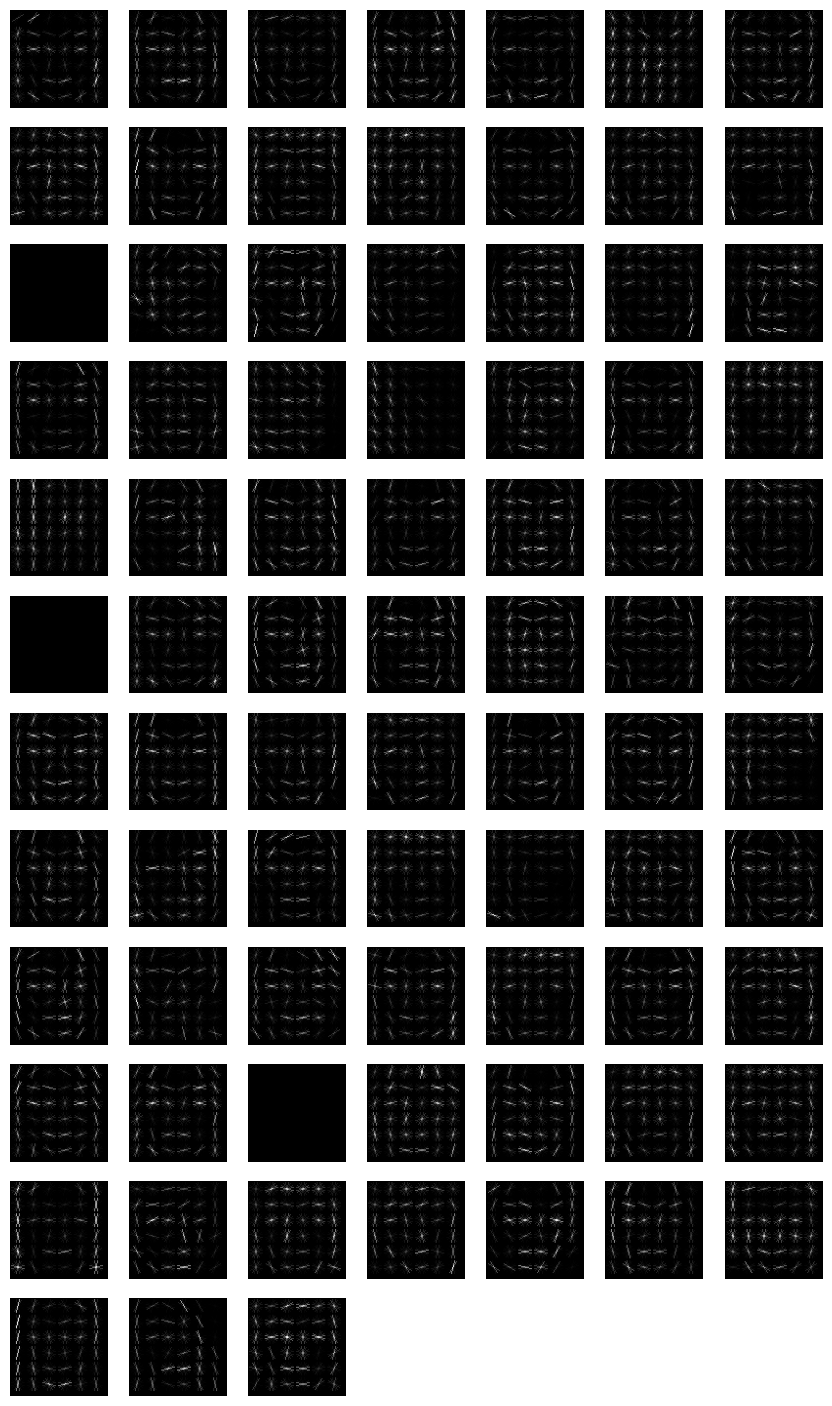

In [9]:
# plot the extracted features from the hog extractor
hog = HOGFeatureExtractor()
ret = hog(opt.X_train)
plot_hog_extracted_result(ret)

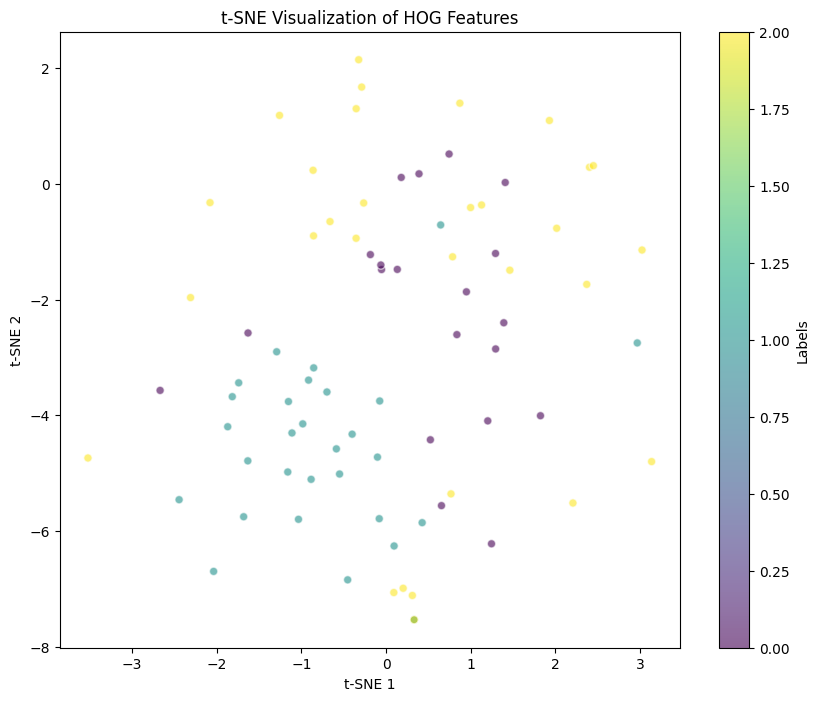

In [10]:
# plot as tSNE space
hog.plot_clustering(opt.X_train, opt.y_train, plot_type='tsne')

### SIFT

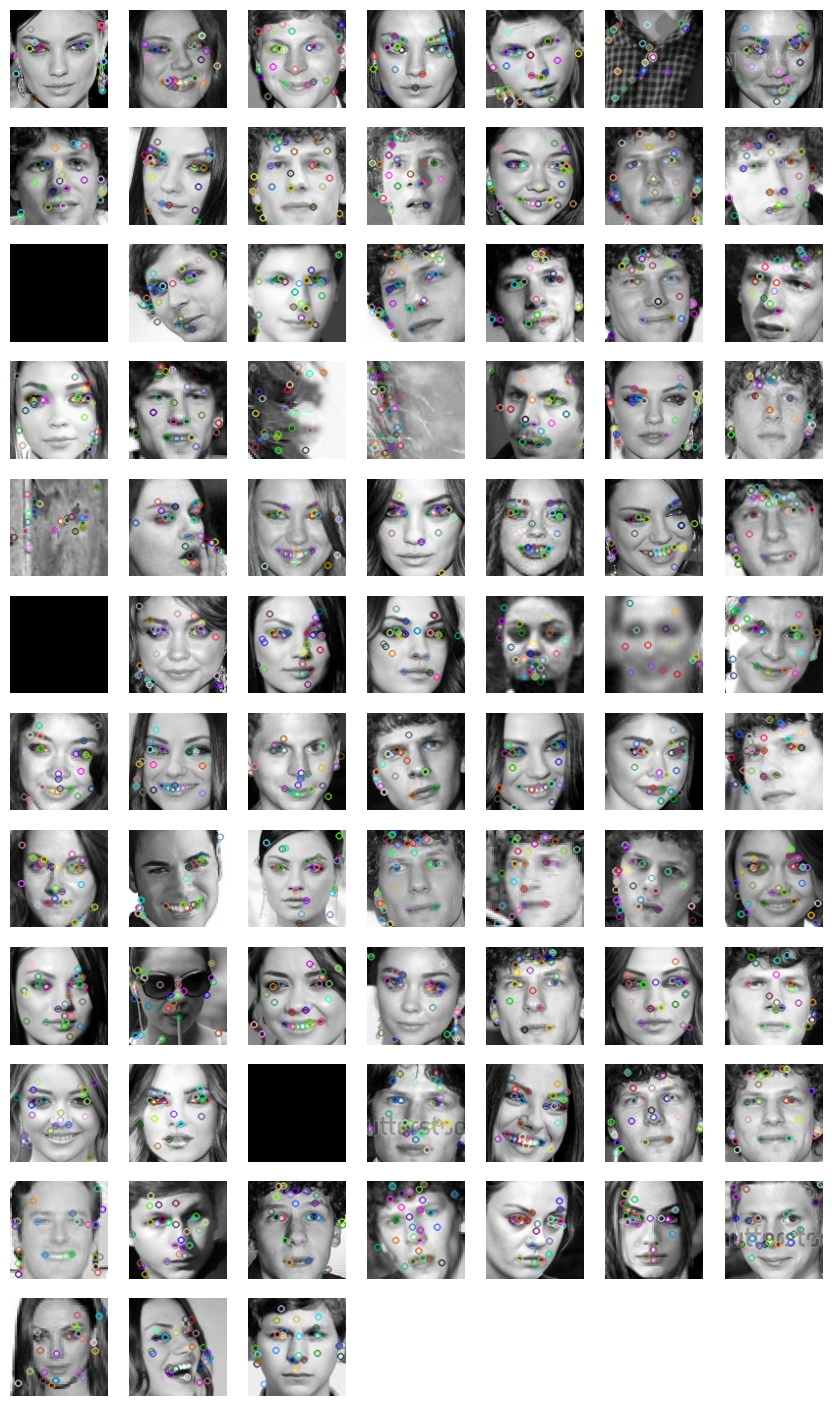

In [11]:
sift = SIFTFeatureExtractor()
ret = sift(opt.X_train)
plot_sift_extracted_result(ret)

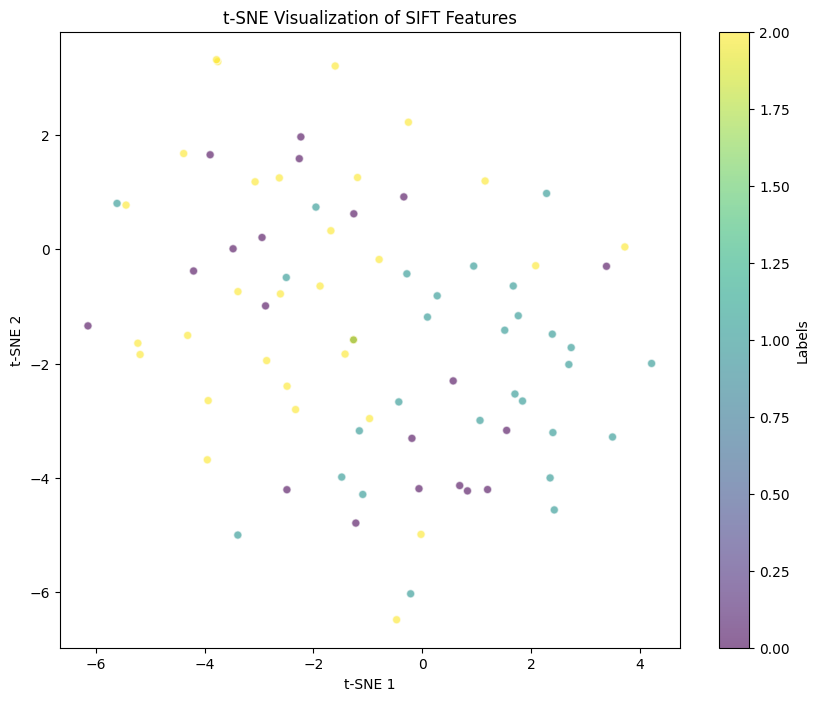

In [12]:
# plot as tSNE space
sift.plot_clustering(opt.X_train, opt.y_train)

### PCA extractor (under dev, TODO)

## Classifier
- so far I've only tried `SVCClassificationModel`

In [13]:
# See y_predict in test dataset

# hog extractor + svc classification model
svc_hog = SVCClassificationModel(hog)
svc_hog.fit(opt.X_train, opt.y_train)
pred_svc_hog = svc_hog(opt.X_test)

# sift extractor + svc classification model
svc_sift = SVCClassificationModel(sift)
svc_sift.fit(opt.X_train, opt.y_train)
pred_svc_sift = svc_sift(opt.X_test)


In [14]:
# print as polars dataframe (memory-efficient than pandas)
df = pl.DataFrame().with_columns(
        [
            pl.Series(pred_svc_hog).alias('predict_hog'),
            pl.Series(pred_svc_sift).alias('predict_sift')
        ]
    )
printdf(df)

shape: (1_816, 2)
┌─────────────┬──────────────┐
│ predict_hog ┆ predict_sift │
│ ---         ┆ ---          │
│ i64         ┆ i64          │
╞═════════════╪══════════════╡
│ 1           ┆ 2            │
│ 2           ┆ 1            │
│ 1           ┆ 1            │
│ 1           ┆ 0            │
│ 1           ┆ 0            │
│ 1           ┆ 0            │
│ 1           ┆ 1            │
│ 2           ┆ 1            │
│ 1           ┆ 2            │
│ 2           ┆ 1            │
│ 2           ┆ 1            │
│ 1           ┆ 0            │
│ 2           ┆ 2            │
│ 1           ┆ 1            │
│ 2           ┆ 2            │
│ 1           ┆ 0            │
│ 1           ┆ 1            │
│ 2           ┆ 0            │
│ 2           ┆ 2            │
│ 1           ┆ 2            │
│ 2           ┆ 0            │
│ 1           ┆ 0            │
│ 2           ┆ 1            │
│ 1           ┆ 1            │
│ 2           ┆ 2            │
│ 1           ┆ 0            │
│ 1           ┆ 2    

'shape: (1_816, 2)\n┌─────────────┬──────────────┐\n│ predict_hog ┆ predict_sift │\n│ ---         ┆ ---          │\n│ i64         ┆ i64          │\n╞═════════════╪══════════════╡\n│ 1           ┆ 2            │\n│ 2           ┆ 1            │\n│ 1           ┆ 1            │\n│ 1           ┆ 0            │\n│ 1           ┆ 0            │\n│ 1           ┆ 0            │\n│ 1           ┆ 1            │\n│ 2           ┆ 1            │\n│ 1           ┆ 2            │\n│ 2           ┆ 1            │\n│ 2           ┆ 1            │\n│ 1           ┆ 0            │\n│ 2           ┆ 2            │\n│ 1           ┆ 1            │\n│ 2           ┆ 2            │\n│ 1           ┆ 0            │\n│ 1           ┆ 1            │\n│ 2           ┆ 0            │\n│ 2           ┆ 2            │\n│ 1           ┆ 2            │\n│ 2           ┆ 0            │\n│ 1           ┆ 0            │\n│ 2           ┆ 1            │\n│ 1           ┆ 1            │\n│ 2           ┆ 2            │\n│ 1           ┆ 0   